In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import imblearn

import importlib
import Projet7_utils as utils
importlib.reload(utils)

<module 'Projet7_utils' from 'e:\\Git\\OpenClassrooms_Projet7\\Projet7_utils.py'>

In [11]:
PATH = "E:/OpenClassrooms/Projet7/Data"

df = pd.read_csv(os.path.join(PATH, "application_train.csv"))
df_test = pd.read_csv(os.path.join(PATH, "application_test.csv"))

In [12]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
importlib.reload(utils)

utils.diff_lists(df.columns.tolist(), df_test.columns.tolist())[0]

['TARGET']

## Cleaning, feature engineering

In [14]:
to_drop = [
    'NAME_TYPE_SUITE',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'OWN_CAR_AGE',
]

df = df.drop(to_drop, axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df['INCOME_CREDIT_RATE'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['ANNUITY_INCOME_RATE'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

In [16]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [17]:
ind = df.loc[df['CODE_GENDER']=='XNA'].index

df = df.drop(ind, axis=0)

In [18]:
importlib.reload(utils)

list_cat_to_binary = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'EMERGENCYSTATE_MODE'
]

for i in list_cat_to_binary:
    df[i] = utils.cat_to_binary(df[i])

In [19]:
df = df.set_index('SK_ID_CURR')

# Preprocess data

In [20]:
# split data and target
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [21]:
list_cat_other = [i for i in df.columns.tolist() if df[i].dtypes=='O' and i not in list_cat_to_binary]

In [22]:
importlib.reload(utils)

X_train, X_test, y_train, y_test = utils.preprocess_data(X, y, list_cat_other)

e:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [23]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE:block of flats,HOUSETYPE_MODE:terraced house,HOUSETYPE_MODE:specific housing,"WALLSMATERIAL_MODE:Stone, brick",WALLSMATERIAL_MODE:Block,WALLSMATERIAL_MODE:Panel,WALLSMATERIAL_MODE:Mixed,WALLSMATERIAL_MODE:Wooden,WALLSMATERIAL_MODE:Others,WALLSMATERIAL_MODE:Monolithic
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
380842,-0.323416,-1.387472,-0.716417,-0.664029,-0.576857,0.503736,-1.129568,-0.682924,-1.091217,1.079319,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
285544,-0.323416,0.720735,-0.716417,1.505958,-0.576857,0.302714,0.850756,0.038993,0.368858,1.079319,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
380347,-0.323416,-1.387472,-0.716417,-0.664029,2.194439,1.307827,-0.343410,-0.662759,-0.580191,0.127111,...,10.72653,0.0,0.0,5.824442,0.0,0.0,0.0,0.000000,0.000000,0.0
135529,-0.323416,0.720735,1.395836,1.505958,-0.576857,2.111918,0.187746,0.242507,0.368858,-0.785466,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
100999,-0.323416,-1.387472,1.395836,1.505958,-0.576857,2.513963,3.786686,3.722414,3.909538,3.734536,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239012,-0.323416,0.720735,-0.716417,-0.664029,-0.576857,0.785168,-0.536308,0.226375,-0.519354,1.833448,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,2.454847,0.0
399944,-0.323416,0.720735,-0.716417,-0.664029,2.194439,-0.501377,1.709098,0.736711,1.585586,-0.307735,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
253019,-0.323416,-1.387472,-0.716417,-0.664029,0.808791,0.302714,-0.675373,-0.392544,-0.726198,-0.834063,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0


In [24]:
X_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE:block of flats,HOUSETYPE_MODE:terraced house,HOUSETYPE_MODE:specific housing,"WALLSMATERIAL_MODE:Stone, brick",WALLSMATERIAL_MODE:Block,WALLSMATERIAL_MODE:Panel,WALLSMATERIAL_MODE:Mixed,WALLSMATERIAL_MODE:Wooden,WALLSMATERIAL_MODE:Others,WALLSMATERIAL_MODE:Monolithic
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
369780,-0.323416,0.720735,-0.716417,-0.664029,2.194439,-0.863218,-0.993752,-0.787163,-0.981711,0.310726,...,10.72653,0.0,0.0,0.0,0.0,0.0,0.0,2.235805,0.000000,0.0
405321,-0.323416,0.720735,-0.716417,1.505958,-0.576857,0.471573,-0.872624,-1.192641,-0.787035,-0.408329,...,10.72653,0.0,0.0,0.0,0.0,0.0,0.0,2.235805,0.000000,0.0
142233,-0.323416,-1.387472,-0.716417,1.505958,-0.576857,1.709872,-0.193898,1.912503,-0.117834,1.833448,...,10.72653,0.0,0.0,0.0,0.0,0.0,0.0,2.235805,0.000000,0.0
423634,-0.323416,-1.387472,1.395836,-0.664029,-0.576857,1.709872,0.559601,0.875697,0.502698,1.833448,...,10.72653,0.0,0.0,0.0,0.0,0.0,0.0,2.235805,0.000000,0.0
271981,-0.323416,0.720735,-0.716417,-0.664029,-0.576857,-0.300355,0.071451,-0.305058,-0.166503,-0.149432,...,10.72653,0.0,0.0,0.0,0.0,0.0,0.0,2.235805,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248655,-0.323416,0.720735,-0.716417,-0.664029,0.808791,-0.099332,0.474068,0.921922,0.454029,0.310726,...,10.72653,0.0,0.0,0.0,0.0,0.0,0.0,2.235805,0.000000,0.0
451808,-0.323416,0.720735,-0.716417,1.505958,2.194439,3.318054,0.386649,0.204348,0.368858,-0.149432,...,10.72653,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.454847,0.0
208080,-0.323416,-1.387472,1.395836,1.505958,2.194439,-1.064241,-0.370344,-0.360280,-0.239507,-0.192244,...,10.72653,0.0,0.0,0.0,0.0,0.0,0.0,2.235805,0.000000,0.0


# Dummy classifier

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

dummy_predict = dummy_clf.predict(X_test.values)
print("Accuracy: ", dummy_clf.score(dummy_predict, y_test))
print("AUROC: ", roc_auc_score(y_test, dummy_predict))

Accuracy:  0.9183603785242757
AUROC:  0.5


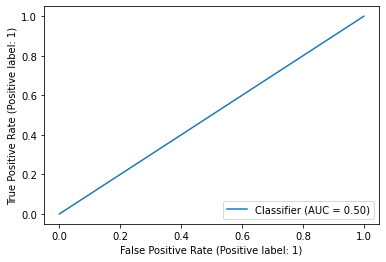

In [27]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, dummy_predict)

# Logistic regression

In [40]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE:block of flats,HOUSETYPE_MODE:terraced house,HOUSETYPE_MODE:specific housing,"WALLSMATERIAL_MODE:Stone, brick",WALLSMATERIAL_MODE:Block,WALLSMATERIAL_MODE:Panel,WALLSMATERIAL_MODE:Mixed,WALLSMATERIAL_MODE:Wooden,WALLSMATERIAL_MODE:Others,WALLSMATERIAL_MODE:Monolithic
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
380842,-0.323416,-1.387472,-0.716417,-0.664029,-0.576857,0.503736,-1.129568,-0.682924,-1.091217,1.079319,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
285544,-0.323416,0.720735,-0.716417,1.505958,-0.576857,0.302714,0.850756,0.038993,0.368858,1.079319,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
380347,-0.323416,-1.387472,-0.716417,-0.664029,2.194439,1.307827,-0.343410,-0.662759,-0.580191,0.127111,...,10.72653,0.0,0.0,5.824442,0.0,0.0,0.0,0.000000,0.000000,0.0
135529,-0.323416,0.720735,1.395836,1.505958,-0.576857,2.111918,0.187746,0.242507,0.368858,-0.785466,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
100999,-0.323416,-1.387472,1.395836,1.505958,-0.576857,2.513963,3.786686,3.722414,3.909538,3.734536,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239012,-0.323416,0.720735,-0.716417,-0.664029,-0.576857,0.785168,-0.536308,0.226375,-0.519354,1.833448,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,2.454847,0.0
399944,-0.323416,0.720735,-0.716417,-0.664029,2.194439,-0.501377,1.709098,0.736711,1.585586,-0.307735,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0
253019,-0.323416,-1.387472,-0.716417,-0.664029,0.808791,0.302714,-0.675373,-0.392544,-0.726198,-0.834063,...,10.72653,0.0,0.0,0.000000,0.0,0.0,0.0,2.235805,0.000000,0.0


In [70]:
from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train.values, y_train.ravel())

model = imbpipe(steps=[
    ('sampling', SMOTE()),
    ('classification', LogisticRegression())
    ])

par_grid = {
    'classification__tol': np.logspace(-5, -2, 4),
    'classification__C': np.linspace(0.1, 10, 5),
    'classification__max_iter': [50, 100, 200]
}

LogReg = GridSearchCV(
    model,
    param_grid=par_grid,
    scoring='roc_auc',
    verbose=1,
    n_jobs=4
    )

LogReg.fit(X_train, y_train)

print('Best hyperparams: ', LogReg.best_params_)
print('Best mean score: ', LogReg.best_score_)
print('std: ', LogReg.cv_results_['std_test_score'][result.best_index_])

Fitting 5 folds for each of 60 candidates, totalling 300 fits


ValueError: 
All the 300 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Anaconda\lib\site-packages\imblearn\pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "e:\Anaconda\lib\site-packages\imblearn\pipeline.py", line 226, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "e:\Anaconda\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "e:\Anaconda\lib\site-packages\imblearn\pipeline.py", line 394, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "e:\Anaconda\lib\site-packages\imblearn\base.py", line 83, in fit_resample
    output = self._fit_resample(X, y)
  File "e:\Anaconda\lib\site-packages\imblearn\over_sampling\_smote\filter.py", line 179, in _fit_resample
    danger_index = self._in_danger_noise(
  File "e:\Anaconda\lib\site-packages\imblearn\over_sampling\_smote\base.py", line 190, in _in_danger_noise
    x = nn_estimator.kneighbors(samples, return_distance=False)[:, 1:]
  File "e:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = PairwiseDistancesArgKmin.compute(
  File "sklearn\metrics\_pairwise_distances_reduction.pyx", line 698, in sklearn.metrics._pairwise_distances_reduction.PairwiseDistancesArgKmin.compute
  File "e:\Anaconda\lib\site-packages\sklearn\utils\fixes.py", line 151, in threadpool_limits
    return threadpoolctl.threadpool_limits(limits=limits, user_api=user_api)
  File "e:\Anaconda\lib\site-packages\threadpoolctl.py", line 171, in __init__
    self._original_info = self._set_threadpool_limits()
  File "e:\Anaconda\lib\site-packages\threadpoolctl.py", line 268, in _set_threadpool_limits
    modules = _ThreadpoolInfo(prefixes=self._prefixes,
  File "e:\Anaconda\lib\site-packages\threadpoolctl.py", line 340, in __init__
    self._load_modules()
  File "e:\Anaconda\lib\site-packages\threadpoolctl.py", line 373, in _load_modules
    self._find_modules_with_enum_process_module_ex()
  File "e:\Anaconda\lib\site-packages\threadpoolctl.py", line 485, in _find_modules_with_enum_process_module_ex
    self._make_module_from_path(filepath)
  File "e:\Anaconda\lib\site-packages\threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "e:\Anaconda\lib\site-packages\threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "e:\Anaconda\lib\site-packages\threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [61]:
from imblearn.over_sampling import BorderlineSMOTE
X_train_smote, y_train_smote = BorderlineSMOTE().fit_resample(X_train, y_train)

AttributeError: 'NoneType' object has no attribute 'split'

In [76]:
X_train.dtypes.unique()

array([dtype('float64')], dtype=object)

In [57]:
type(y_train.values)

numpy.ndarray